In [182]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import precision_score

%matplotlib inline
plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 20,
        'axes.labelsize': 20,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'font.size': 20,
        'figure.figsize': (10, 7),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })

In [183]:
import warnings
warnings.filterwarnings("ignore")

## Exploring the data

In [184]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [186]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [187]:
# check the missing data (isna and isnull are same?)
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data cleaning

#### Cabin column
It seems not very important for building our model and most values are NaNs so we just drop it

In [188]:
titanic_data = titanic_data.drop(['Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [189]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Age column
There are lot of missing values may be we can replace them with median values

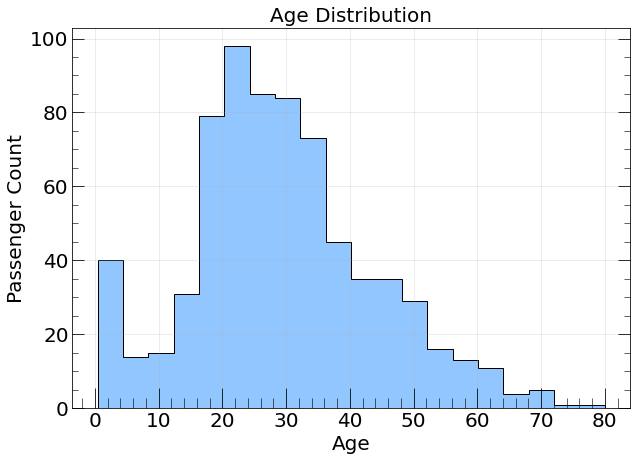

In [190]:
# plot the Age distribution
fig = plt.figure()
ax = plt.hist(titanic_data['Age'], bins=20, histtype='stepfilled', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
fig.show()

In [191]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

In [192]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [193]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Embarked column
Fill missing values with median too

In [194]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [195]:
titanic_data['Embarked'].mode().to_string()

'0    S'

In [196]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode().to_string())

In [197]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [198]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q', '0    S'], dtype=object)

In [199]:
titanic_data['Embarked'].value_counts()

S         644
C         168
Q          77
0    S      2
Name: Embarked, dtype: int64

#### Fare column
About 1.7% of fares are equal to zero, replace it with mean value

In [200]:
titanic_data[titanic_data['Fare'] == 0].Fare.count() / titanic_data.Fare.count()

0.016835016835016835

In [201]:
titanic_data['Fare'] = titanic_data['Fare'].replace(0, titanic_data['Fare'].mean())

In [202]:
# Check if any fares are zero
titanic_data[titanic_data['Fare'] == 0]['Fare'].count()

0

In [203]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.746366
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.514272
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.100000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,32.204208
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [204]:
# generate the training set descriptive statistics including only string columns
titanic_data.describe(include=[object])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,4
top,"Lefebre, Miss. Mathilde",male,347082,S
freq,1,577,7,644


## Adding columns and processing some data

#### Ticket column to Acompained column

Create new 'Acompained' column based on tickets numbers <br>
Passengers with same ticket number counts as acompined

In [205]:
titanic_data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
CA 2144     6
           ..
2623        1
330935      1
113794      1
239854      1
330931      1
Name: Ticket, Length: 681, dtype: int64

In [206]:
# Create new col
titanic_data['Acompained'] = titanic_data['Ticket'].duplicated(keep=False).astype(int)
# Drop Ticket col
titanic_data = titanic_data.drop(['Ticket'], axis=1)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Acompained
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1


#### Name Column to Title column

In [207]:
# Extract titles which end with '.' into the Name column

titanic_data['Title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titanic_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [208]:
# count the number of each title
titanic_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Sir           1
Jonkheer      1
Capt          1
Lady          1
Mme           1
Countess      1
Don           1
Name: Title, dtype: int64

In [209]:
# Now we can replace all values with counts below Master count with 'Others'
titles_to_replace = titanic_data['Title'].value_counts()[4:].index.tolist()
titanic_data['Title'] = titanic_data['Title'].replace(titles_to_replace, 'Others')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Acompained,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Mr


In [210]:
# Ensure that we cleared all titles with low frequencies
titanic_data['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64

In [211]:
# Drop Name column
titanic_data = titanic_data.drop('Name', axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Acompained,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,0,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr


## Data visualisation

In [212]:
# Drop 'PassengerId' col
titanic_data = titanic_data.drop(['PassengerId'], axis=1)
print(titanic_data.shape)
titanic_data.head()

(891, 10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Acompained,Title
0,0,3,male,22.0,1,0,7.2500,S,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,Mr


Now we have the following categorical predictors:
* Pclass
* Sex
* Embarked
* Acompained
* Title

Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
Values: [C, Q, S]

Parch: The dataset defines family relations in this way... <br>
Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them. <br>
Values: [0, 1, 2, 3, 4, 5, 6]

SibSp: the dataset defines family relations in this way... <br>
Sibling = brother, sister, stepbrother, stepsister <br>
Values: [0, 1, 2, 3, 4, 5, 8]

Acompained: if person was acompainde on board, see above <br>
Values: [0, 1]

Title: title in name of person <br>
Values: ['Mr', 'Mrs', 'Miss', 'Master', 'Others']

In [213]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Acompained,Title
0,0,3,male,22.0,1,0,7.2500,S,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,Mr


## Features analysis

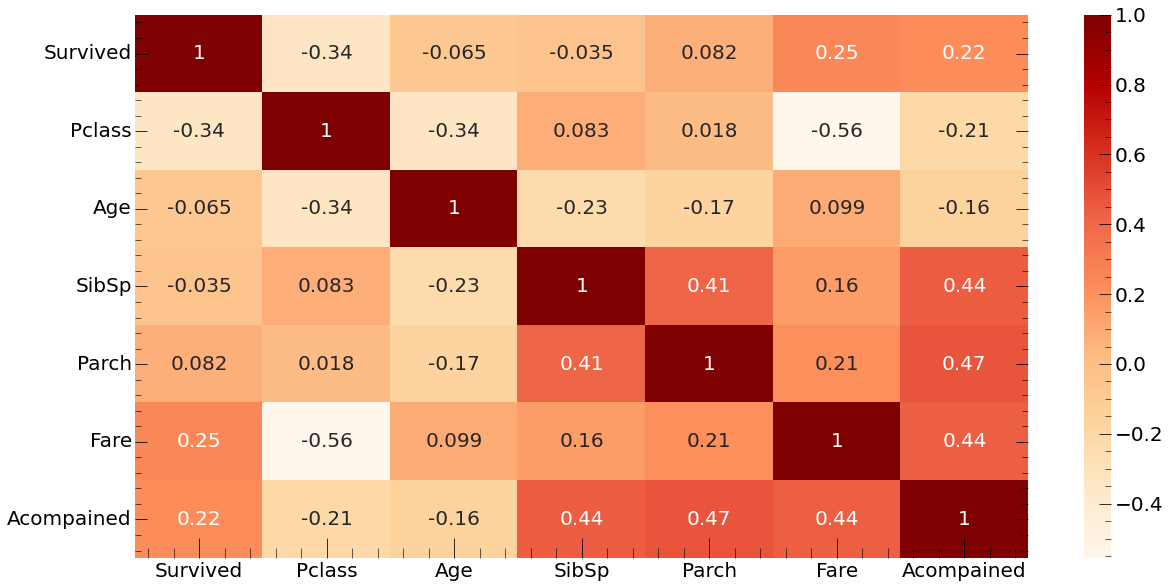

In [214]:
plt.figure(figsize=(20,10))
sns.heatmap(titanic_data.corr(), annot = True, cmap="OrRd")
plt.show()

There are storng correlation between some features
* Pclass and Fare (which is expected because tickets to 1st class are more expensive)
* Parch and SibSp
* Acompained and SibSp, Parch, Fair

The following features have some correlation particulary with Survived target
* Pclass
* Fare
* Acompained

In [215]:
# We can look at susvival rate at each Pclass
# squeeze method to make serise
pclass_survived_dist = titanic_data.groupby('Pclass').agg({'Survived': lambda x: x.sum() / x.count()}).squeeze()

# or simply we can do the same with
display(titanic_data.groupby('Pclass').Survived.apply(lambda x: x.sum() / x.count()))


# Or we can just use mean
pclass_survived_dist

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [216]:
def distribution(data, title, x_label, y_label):
    plt.figure(figsize=(8,5))
    plt.style.use('seaborn-pastel')
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

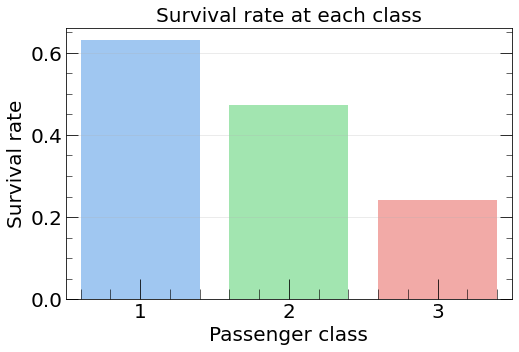

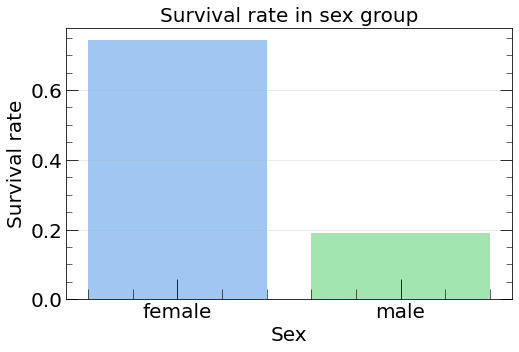

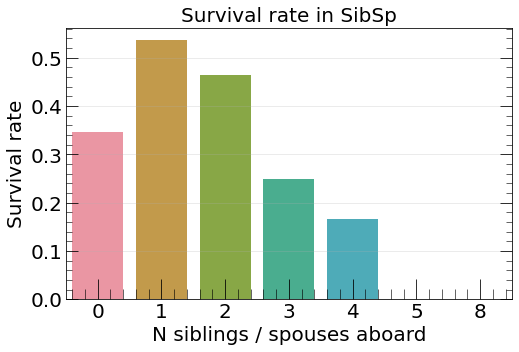

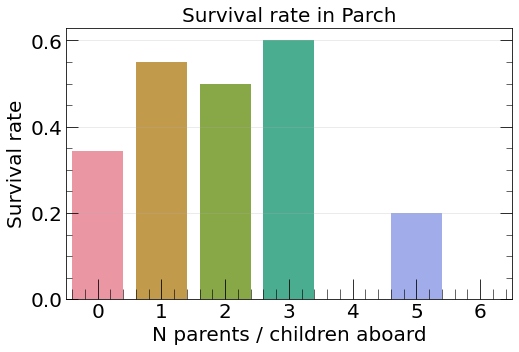

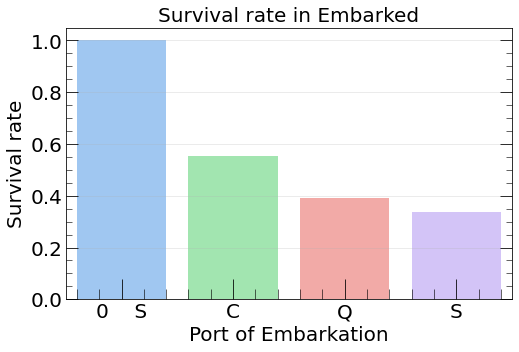

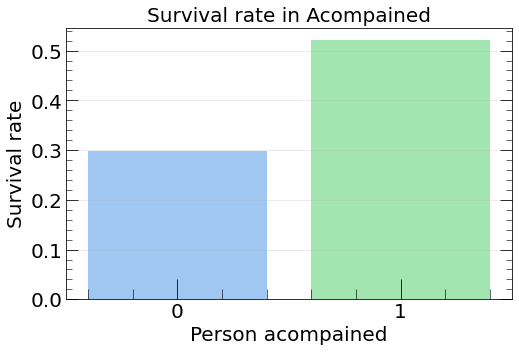

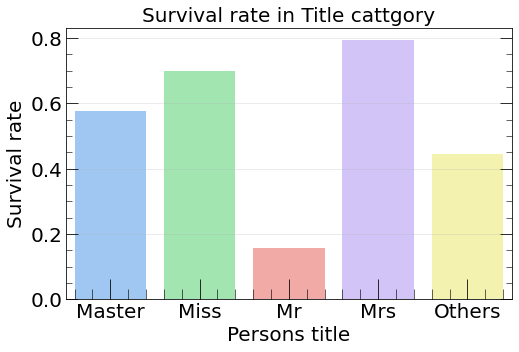

In [218]:
distribution(data=pclass_survived_dist,
             title='Survival rate at each class',
             x_label='Passenger class',
             y_label='Survival rate')

# Sex
sex_survived_dist = titanic_data.groupby('Sex').Survived.mean()
distribution(data=sex_survived_dist,
             title='Survival rate in sex group',
             x_label='Sex',
             y_label='Survival rate')

# SibSp (is categorical or numercal?)
sibsp_survived_dist = titanic_data.groupby('SibSp').Survived.mean()
distribution(data=sibsp_survived_dist,
             title='Survival rate in SibSp',
             x_label='N siblings / spouses aboard',
             y_label='Survival rate')

# SibSp (is categorical or numercal?)
parch_survived_dist = titanic_data.groupby('Parch').Survived.mean()
distribution(data=parch_survived_dist,
             title='Survival rate in Parch',
             x_label='N parents / children aboard',
             y_label='Survival rate')

# Embarked
parch_survived_dist = titanic_data.groupby('Embarked').Survived.mean()
distribution(data=parch_survived_dist,
             title='Survival rate in Embarked',
             x_label='Port of Embarkation',
             y_label='Survival rate')

# Acompained
parch_survived_dist = titanic_data.groupby('Acompained').Survived.mean()
distribution(data=parch_survived_dist,
             title='Survival rate in Acompained',
             x_label='Person acompained',
             y_label='Survival rate')

# Title
parch_survived_dist = titanic_data.groupby('Title').Survived.mean()
distribution(data=parch_survived_dist,
             title='Survival rate in Title cattgory',
             x_label='Persons title',
             y_label='Survival rate')

In [219]:
# We can take a look at t-test results for each category for example Sex
stats.ttest_ind(titanic_data.loc[titanic_data['Sex'] == 'male']['Survived'],
                titanic_data.loc[titanic_data['Sex'] == 'female']['Survived'])

Ttest_indResult(statistic=-19.29781655012335, pvalue=1.4060661308802594e-69)

In [220]:
# In case of multiple categories we should perform ANOVA test
arr1 = titanic_data.loc[titanic_data['Pclass'] == 1]['Survived'].to_numpy()
arr2 = titanic_data.loc[titanic_data['Pclass'] == 2]['Survived'].to_numpy()
arr3 = titanic_data.loc[titanic_data['Pclass'] == 3]['Survived'].to_numpy()
F, p = stats.f_oneway(arr1, arr2, arr3)
print(f'F = {F}')
print(f'p = {p}')

F = 57.964817590910116
p = 2.1832474151179777e-24


In [222]:
def one_way_anova(feature):
    print('-'*40)
    print(f'Feature: {feature}')
    feature_unique = titanic_data[feature].unique()
    feature_unique.sort()
    print(', '.join(map(str, list(feature_unique.tolist()))))
    # Both methods are ok
    # samples = [titanic_data.loc[titanic_data[feature] == val]['Survived'].to_numpy() for val in feature_unique]
    samples = [list(frame) for group,frame in titanic_data.groupby(feature)['Survived']]
    F, p = stats.f_oneway(*samples)
    print(f'F = {F}')
    print(f'p = {p}')
    print('-'*40)
    
for col in ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Title', 'Acompained']:
    one_way_anova(col)

----------------------------------------
Feature: Sex
female, male
F = 372.4057236022147
p = 1.406066130879677e-69
----------------------------------------
----------------------------------------
Feature: Pclass
1, 2, 3
F = 57.964817590910116
p = 2.1832474151179777e-24
----------------------------------------
----------------------------------------
Feature: SibSp
0, 1, 2, 3, 4, 5, 8
F = 6.432231527476453
p = 1.1965348387562683e-06
----------------------------------------
----------------------------------------
Feature: Parch
0, 1, 2, 3, 4, 5, 6
F = 4.7671437467998885
p = 8.565596927115134e-05
----------------------------------------
----------------------------------------
Feature: Embarked
0    S, C, Q, S
F = 10.184967261608808
p = 1.342286808680765e-06
----------------------------------------
----------------------------------------
Feature: Title
Master, Miss, Mr, Mrs, Others
F = 103.2659004746943
p = 3.3630059526847416e-72
----------------------------------------
---------------

## Numerical features analysis

In [223]:
# First, make dummies from features that 100% must be categorical
# Sex, Embarked
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Acompained  891 non-null    int64  
 9   Title       891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [224]:
titanic_data = pd.get_dummies(data=titanic_data, drop_first=True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Acompained,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,1,0,0


In [225]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Acompained    891 non-null    int64  
 7   Sex_male      891 non-null    uint8  
 8   Embarked_C    891 non-null    uint8  
 9   Embarked_Q    891 non-null    uint8  
 10  Embarked_S    891 non-null    uint8  
 11  Title_Miss    891 non-null    uint8  
 12  Title_Mr      891 non-null    uint8  
 13  Title_Mrs     891 non-null    uint8  
 14  Title_Others  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 55.8 KB


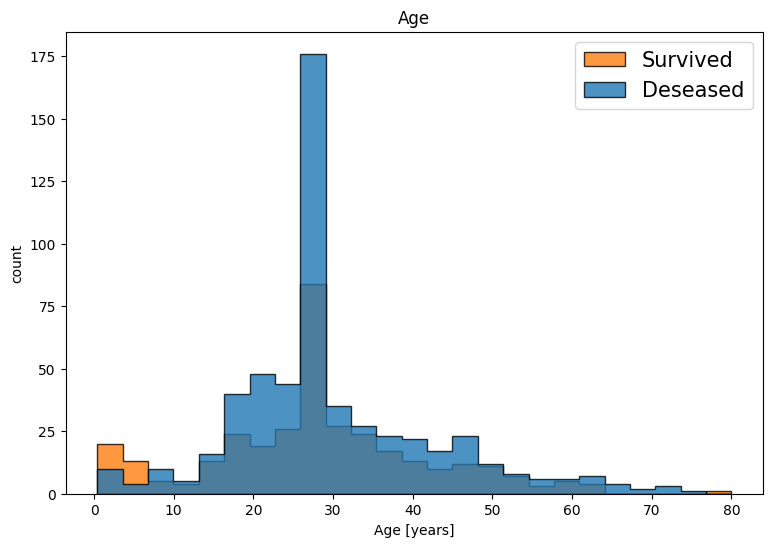

In [226]:
plt.style.use('default')
plt.figure(figsize=(9, 6))
plt.hist([
    titanic_data[titanic_data['Survived'] == 0]['Age'],
    titanic_data[titanic_data['Survived'] == 1]['Age']
],
         bins=25,
         histtype='stepfilled',
         label=['Deseased', 'Survived'],
         edgecolor='black',
         alpha=0.8)
plt.ylabel('count')
plt.xlabel('Age [years]')
plt.title('Age')
plt.legend(prop={'size': 15})
plt.show()

No handles with labels found to put in legend.


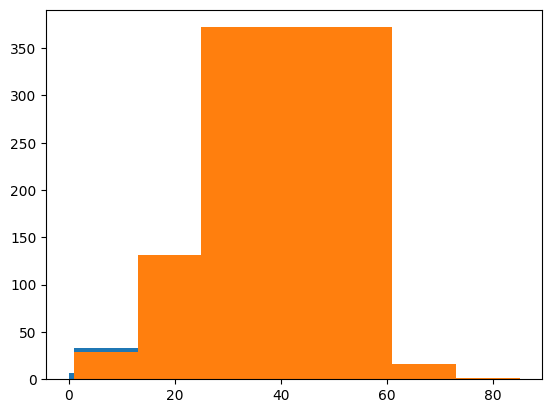

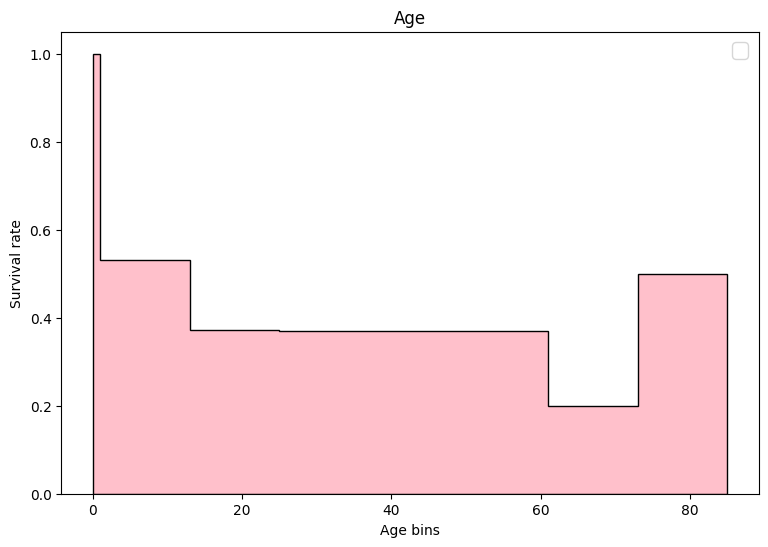

In [263]:
age_bins = [0, 1, 13, 25, 61, 73, 85]
age_bins_centers = [(age_bins[i] + age_bins[i+1]) / 2 for i in range(len(age_bins)-1)]

survived_hist_weights = plt.hist(titanic_data[titanic_data['Survived'] == 1]['Age'], bins=age_bins)[0]
deseased_hist_weights = plt.hist(titanic_data[titanic_data['Survived'] == 0]['Age'], bins=age_bins)[0]
age_weights = survived_hist_weights / (survived_hist_weights + deseased_hist_weights)

plt.style.use('default')
plt.figure(figsize=(9, 6))
plt.hist(x=age_bins_centers,
         bins=age_bins,
         weights=age_weights,
         histtype='stepfilled',
         color='pink',
         edgecolor='black')
plt.ylabel('Survival rate')
plt.xlabel('Age bins')
plt.title('Age')
plt.legend(prop={'size': 15})
plt.show()

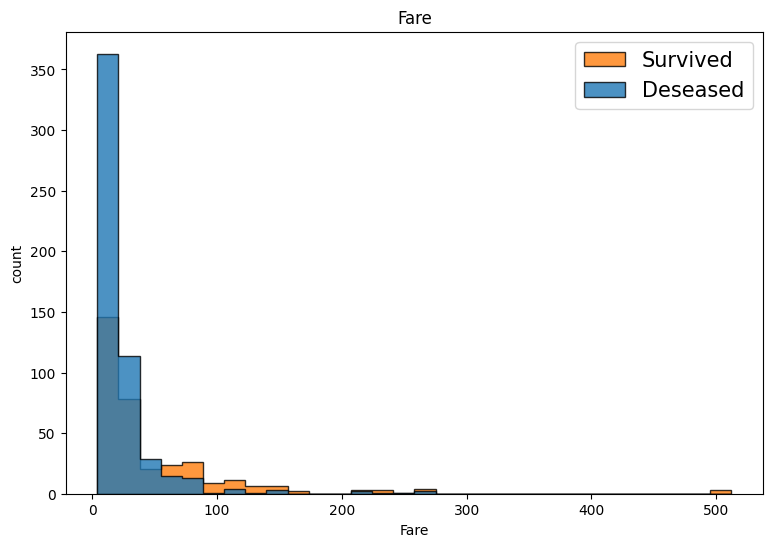

In [264]:
plt.figure(figsize=(9, 6))
plt.hist([
    titanic_data[titanic_data['Survived'] == 0]['Fare'],
    titanic_data[titanic_data['Survived'] == 1]['Fare']
],
         bins=30,
         histtype='stepfilled',
         label=['Deseased', 'Survived'],
         edgecolor='black',
         alpha=0.8)
plt.ylabel('count')
plt.xlabel('Fare')
plt.title('Fare')
plt.legend(prop={'size': 15})
plt.show()

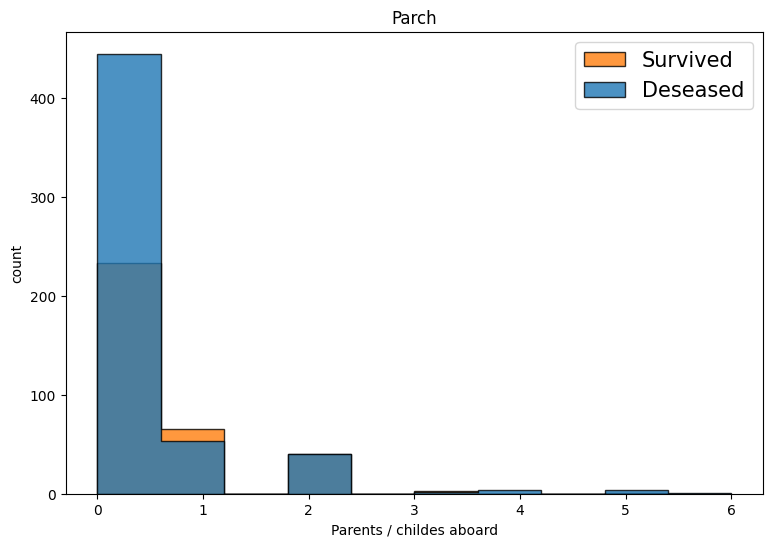

In [265]:
plt.figure(figsize=(9, 6))
plt.hist([
    titanic_data[titanic_data['Survived'] == 0]['Parch'],
    titanic_data[titanic_data['Survived'] == 1]['Parch']
],
         histtype='stepfilled',
         label=['Deseased', 'Survived'],
         edgecolor='black',
         alpha=0.8)
plt.ylabel('count')
plt.xlabel('Parents / childes aboard')
plt.title('Parch')
plt.legend(prop={'size': 15})
plt.show()

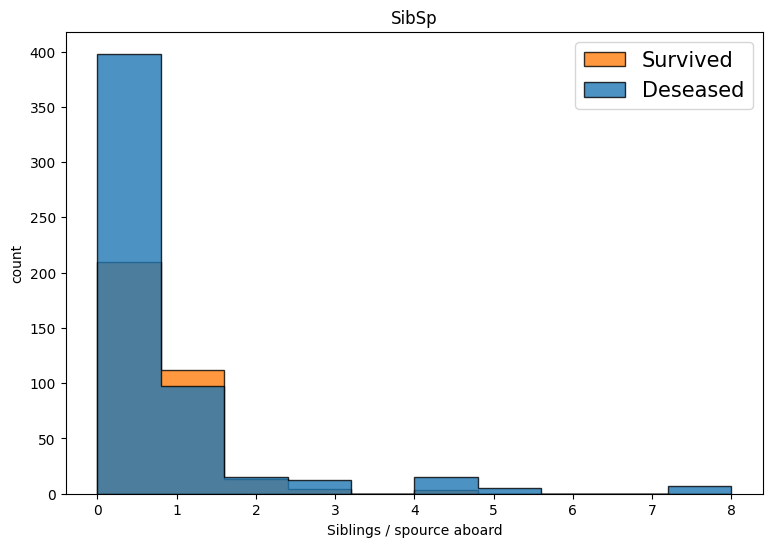

In [266]:
plt.figure(figsize=(9, 6))
plt.hist([
    titanic_data[titanic_data['Survived'] == 0]['SibSp'],
    titanic_data[titanic_data['Survived'] == 1]['SibSp']
],
         histtype='stepfilled',
         label=['Deseased', 'Survived'],
         edgecolor='black',
         alpha=0.8)
plt.ylabel('count')
plt.xlabel('Siblings / spource aboard')
plt.title('SibSp')
plt.legend(prop={'size': 15})
plt.show()

#### inference:
As it was already shown above it seems like people who had been alone aboard had much smaleer chances to survive <br>
At this moment I'd like to keep SibSp, Parch and Pclass feature numerical

In [270]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Acompained    891 non-null    int64  
 7   Sex_male      891 non-null    uint8  
 8   Embarked_C    891 non-null    uint8  
 9   Embarked_Q    891 non-null    uint8  
 10  Embarked_S    891 non-null    uint8  
 11  Title_Miss    891 non-null    uint8  
 12  Title_Mr      891 non-null    uint8  
 13  Title_Mrs     891 non-null    uint8  
 14  Title_Others  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 55.8 KB


## Transform test data

In [322]:
# Test data
X_test = pd.read_csv('test.csv')
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [323]:
# Treat Embarked differently because there are no Nans

X_test['Embarked_C'] = (X_test['Embarked'] == 'C').astype(int)
X_test['Embarked_Q'] = (X_test['Embarked'] == 'Q').astype(int)
X_test['Embarked_S'] = (X_test['Embarked'] == 'S').astype(int)
X_test = X_test.drop(['Embarked'], axis=1)
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,0,1


In [324]:
# Some problems with titles too

X_test['Title'] = X_test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titles_to_replace_test = X_test['Title'].value_counts()[4:].index.tolist()
print(titles_to_replace_test)
X_test['Title'].value_counts()
X_test['Title'] = X_test['Title'].replace(titles_to_replace_test, 'Others')
X_test = X_test.drop('Name', axis=1)
X_test.Title.value_counts()

['Col', 'Rev', 'Ms', 'Dona', 'Dr']


Mr        240
Miss       78
Mrs        72
Master     21
Others      7
Name: Title, dtype: int64

In [325]:
X_test = X_test.drop(['Cabin'], axis=1)
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())
X_test['Fare'] = X_test['Fare'].replace(0, X_test['Fare'].mean())
X_test['Acompained'] = X_test['Ticket'].duplicated(keep=False).astype(int)
X_test = X_test.drop(['Ticket'], axis=1)
X_test = pd.get_dummies(data=X_test, drop_first=True)
X_test = X_test.drop(['PassengerId'], axis=1)

X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Acompained,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,34.5,0,0,7.8292,0,1,0,0,1,0,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0,0
3,3,27.0,0,0,8.6625,0,0,1,0,1,0,1,0,0
4,3,22.0,1,1,12.2875,0,0,1,0,0,0,0,1,0


In [326]:
display(titanic_data.info())
display(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Acompained    891 non-null    int64  
 7   Sex_male      891 non-null    uint8  
 8   Embarked_C    891 non-null    uint8  
 9   Embarked_Q    891 non-null    uint8  
 10  Embarked_S    891 non-null    uint8  
 11  Title_Miss    891 non-null    uint8  
 12  Title_Mr      891 non-null    uint8  
 13  Title_Mrs     891 non-null    uint8  
 14  Title_Others  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 55.8 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Embarked_C    418 non-null    int64  
 6   Embarked_Q    418 non-null    int64  
 7   Embarked_S    418 non-null    int64  
 8   Acompained    418 non-null    int64  
 9   Sex_male      418 non-null    uint8  
 10  Title_Miss    418 non-null    uint8  
 11  Title_Mr      418 non-null    uint8  
 12  Title_Mrs     418 non-null    uint8  
 13  Title_Others  418 non-null    uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 31.6 KB


None

# Building model

In [315]:
# Train data

X_train = titanic_data.drop(['Survived'], axis=1)
display(X_train.head())
y_train = titanic_data.Survived
display(y_train.head())

,Pclass,Age,SibSp,Parch,Fare,Acompained,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,1,0,0
1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,0,0,1,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,1,0,0


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Decision tree classifier

In [317]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

In [318]:
# classifier
clf = tree.DecisionTreeClassifier()
# parameters of model to optimise
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 15),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 13)
              }

np.random.seed(0)
# Initialize model to search for the best parameters in cross validation
grid_search_cv_cls = GridSearchCV(clf, parameters, cv=5)

# run it
grid_search_cv_cls.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30, 2),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])})

In [319]:
# look at the best parameter (cross validation max precision)
print(grid_search_cv_cls.best_params_)
print(grid_search_cv_cls.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.8305316678174629


In [320]:
best_clf = grid_search_cv_cls.best_estimator_
best_clf

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=5)

In [329]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({
    'features': list(X_train),
    'feature_importances': feature_importances
})

# The most important features
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
11,Title_Mr,0.499438
4,Fare,0.186377
0,Pclass,0.153918
1,Age,0.069799
13,Title_Others,0.046712
6,Sex_male,0.022919
9,Embarked_S,0.008074
2,SibSp,0.004289
10,Title_Miss,0.003779
7,Embarked_C,0.002399


In [331]:
y_pred = best_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [334]:
y_test_passenger_id = pd.read_csv('test.csv').PassengerId
test_output = pd.DataFrame({'PassengerId': y_test_passenger_id, 'Survived': y_pred})
test_output_no_index = test_output.set_index('PassengerId')
display(test_output_no_index.head())
test_output_no_index.to_csv('predictions_decision_tree.csv')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


## Random forest

In [338]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

In [339]:
%%time
cls_rf = RandomForestClassifier(random_state=0)

# Parameters grid for random forest
parameters = {'n_estimators': np.arange(10, 20, 3),
              'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(4, 20, 2),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 12)
             }

# Gird itself
grid_search_rf = GridSearchCV(cls_rf, param_grid=parameters, cv=5, n_jobs=-1)

# Fit the data
grid_search_rf.fit(X_train, y_train)

CPU times: user 1min 57s, sys: 2.56 s, total: 2min
Wall time: 9min 26s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([10, 13, 16, 19])})

In [340]:
display(grid_search_rf.best_params_)
display(grid_search_rf.best_score_)

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 16}

0.8361496453455528

In [342]:
%%time

### Some parameters of best model are close to range limit so we should estimate it again
cls_rf_1 = RandomForestClassifier(random_state=42)

# Parameters grid for random forest
parameters_1 = {'n_estimators': np.arange(15, 20),
              'criterion': ['gini'],
              'max_depth': np.arange(15, 25, 2),
              'min_samples_leaf': np.arange(1, 10),
              'min_samples_split': np.arange(2, 15)
             }

# Gird itself
grid_search_rf_1 = GridSearchCV(cls_rf_1, param_grid=parameters_1, cv=5, n_jobs=-1)

# Fit the data
grid_search_rf_1.fit(X_train, y_train)

CPU times: user 55.4 s, sys: 1.4 s, total: 56.8 s
Wall time: 5min 42s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': array([15, 17, 19, 21, 23]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': array([15, 16, 17, 18, 19])})

In [343]:
display(grid_search_rf_1.best_params_)
display(grid_search_rf_1.best_score_)

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 19}

0.8406251961584331

In [355]:
best_clf = grid_search_rf_1.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 19,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [357]:
y_pred = best_clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [358]:
y_test_passenger_id = pd.read_csv('test.csv').PassengerId
test_output = pd.DataFrame({'PassengerId': y_test_passenger_id, 'Survived': y_pred})
test_output_no_index = test_output.set_index('PassengerId')
display(test_output_no_index.head())
test_output_no_index.to_csv('predictions_random_forest_1.csv')

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
